#### Generating Baseline Files

Running the mgrid_301.py file with different mu combinations first one is baseline ($\mu=1.0$ ; no coupling)

In [8]:
!python mgrid_301.py --muea 1.00 --muoa 1.00

9736 magnets are identfied in ./Input/magtense_zot80_3d.csv.
Built a Tiles object with 9736 prisms...
Running run_simulation on 9736 prisms + 4800 points....
 Doing iteration
 Error:       0.0000000 Max. Error:       0.0000100
 Error:       0.0000000 Max. Error:       0.0000100
 Error:       0.0000000 Max. Error:       0.0000100
 Finding solution at requested points
 Elapsed time   164.068129000000     
Saved B-field grid to ./Intermediate/bfield_grid_301_1.00_1.00.npy
Saved updated Tiles to ./Intermediate/Tiles_1.00_1.00.npy
Wrote FICUS PM input CSV → ./PM_FICUS/FICUS_zot80_3d_1.00_1.00.csv


In [18]:
!python mgrid_301.py --muea 1.20 --muoa 1.20

9736 magnets are identfied in ./Input/magtense_zot80_3d.csv.
Built a Tiles object with 9736 prisms...
Running run_simulation on 9736 prisms + 4800 points....
 Doing iteration
 Error: *************** Max. Error:       0.0000100
 Error: *************** Max. Error:       0.0000100
 Error:       0.0505558 Max. Error:       0.0000100
 Error:       0.0086754 Max. Error:       0.0000100
 Error:       0.0015264 Max. Error:       0.0000100
 Error:       0.0002602 Max. Error:       0.0000100
 Error:       0.0000438 Max. Error:       0.0000100
 Error:       0.0000074 Max. Error:       0.0000100
 Finding solution at requested points
 Elapsed time   271.380206000000     
Saved B-field grid to ./Intermediate/bfield_grid_301_1.20_1.20.npy
Saved updated Tiles to ./Intermediate/Tiles_1.20_1.20.npy
Wrote FICUS PM input CSV → ./PM_FICUS/FICUS_zot80_3d_1.20_1.20.csv


In [19]:
!python mgrid_301.py --muea 1.50 --muoa 1.50

9736 magnets are identfied in ./Input/magtense_zot80_3d.csv.
Built a Tiles object with 9736 prisms...
Running run_simulation on 9736 prisms + 4800 points....
 Doing iteration
 Error: *************** Max. Error:       0.0000100
 Error: *************** Max. Error:       0.0000100
 Error:       0.5235307 Max. Error:       0.0000100
 Error:       0.1550389 Max. Error:       0.0000100
 Error:       0.0800093 Max. Error:       0.0000100
 Error:       0.0316199 Max. Error:       0.0000100
 Error:       0.0137290 Max. Error:       0.0000100
 Error:       0.0056520 Max. Error:       0.0000100
 Error:       0.0024324 Max. Error:       0.0000100
 Error:       0.0010330 Max. Error:       0.0000100
 Error:       0.0004384 Max. Error:       0.0000100
 Error:       0.0001851 Max. Error:       0.0000100
 Error:       0.0000780 Max. Error:       0.0000100
 Error:       0.0000328 Max. Error:       0.0000100
 Error:       0.0000138 Max. Error:       0.0000100
 Error:       0.0000058 Max. Error:       0.0

In [1]:
!python mgrid_301.py --muea 5.00 --muoa 5.00

9736 magnets are identfied in ./Input/magtense_zot80_3d.csv.
Built a Tiles object with 9736 prisms...
Running run_simulation on 9736 prisms + 4800 points....
 Doing iteration
 Error: *************** Max. Error:       0.0000100
 Error: *************** Max. Error:       0.0000100
 Error:      34.8885379 Max. Error:       0.0000100
 Error:      14.3537473 Max. Error:       0.0000100
 Error:       5.1044879 Max. Error:       0.0000100
 Error:      28.5295916 Max. Error:       0.0000100
 Error:      11.8754009 Max. Error:       0.0000100
 Error:      43.2940064 Max. Error:       0.0000050
 Error:       8.8757975 Max. Error:       0.0000050
 Error:       2.7050349 Max. Error:       0.0000050
 Error:      11.1007399 Max. Error:       0.0000050
 Error:       2.9753936 Max. Error:       0.0000050
 Error:       2.4778488 Max. Error:       0.0000050
 Error:      15.8307260 Max. Error:       0.0000050
 Error:      10.3388764 Max. Error:       0.0000050
 Error:       3.2635209 Max. Error:       0.0

In [13]:
!ls ./Intermediate

bfield_grid_301_1.00_1.00.npy  Tiles_1.00_1.00.npy
bfield_grid_301_1.05_1.05.npy  Tiles_1.05_1.05.npy
bfield_grid_301_1.20_1.20.npy  Tiles_1.20_1.20.npy
bfield_grid_301_1.50_1.50.npy  Tiles_1.50_1.50.npy
bfield_grid_301_5.00_5.00.npy  Tiles_5.00_5.00.npy
evaluation_points_301.npy


#### Visualization

Trying to visualize the $\Delta m$ differences (in $\theta)$ between different pairs of mu. 

Note: This is only a basic visualization will move onto vtk visualization next.

Max tilt = 3.013e+01°, 95% = 7.575e+00°, Mean = 2.204e+00°


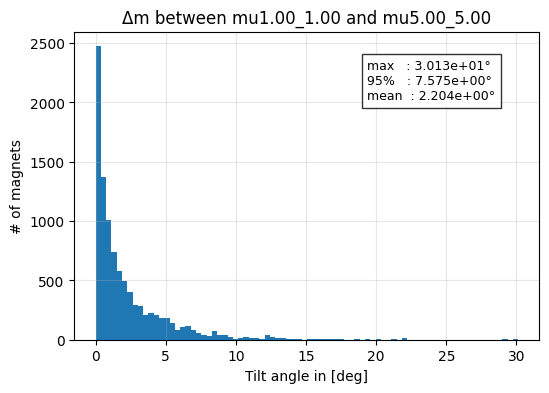

In [16]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

REF_TAG = "mu1.00_1.00" # -> Baseline
CMP_TAG = "mu5.00_5.00"  # Change this if you want a different mu comparison
INT = Path("./Intermediate") # BAse path
def tiles_file(tag: str) -> Path | None:
    path = INT / f"Tiles_{tag[2:]}.npy"
    return path if path.exists() else None

# Loading tiles...
def load_tiles(path: Path):
    obj = np.load(path, allow_pickle=True)
    if hasattr(obj, "M"):
        return obj
    if isinstance(obj, np.ndarray) and obj.ndim == 0 and hasattr(obj.item(), "M"):
        return obj.item()
    raise TypeError(f"Somethign went wrong with the given path")
    
def compare_m_vectors(ref: str, other: str, bins: int = 80):
    p0 = tiles_file(ref)
    p1 = tiles_file(other)
    if p0 is None or p1 is None:
        print("Something went wrong!: Tiles_*.npy missing—skipping m-vector comparison.")
        return

    t0 = load_tiles(p0)
    t1 = load_tiles(p1)

    # Normalize each M‐vector to unit 
    m0 = t0.M/np.linalg.norm(t0.M,axis=1)[:,None]
    m1 = t1.M/np.linalg.norm(t1.M,axis=1)[:,None]

    # Compute tilt angle (in degrees) between each pair
    dot = np.sum(m0 * m1, axis=1)
    dot = np.clip(dot, -1.0, 1.0)
    ang = np.degrees(np.arccos(dot))

    plt.figure(figsize=(6, 4))
    plt.hist(ang, bins=bins)
    plt.xlabel("Tilt angle in [deg]")
    plt.ylabel("# of magnets")
    plt.grid(alpha=0.3)
    plt.title(f"Δm between {ref} and {other}")
    txt = (
        f"max   : {ang.max():.3e}°\n" # Most important for bound
        f"95%   : {np.percentile(ang, 95):.3e}°\n"
        f"mean  : {ang.mean():.3e}°") 
    plt.text(0.63, 0.78, txt,transform=plt.gca().transAxes,bbox=dict(facecolor="white", alpha=0.8),fontsize=9) # Text formatting stuff
    print(
        f"Max tilt = {ang.max():.3e}°, "f"95% = {np.percentile(ang, 95):.3e}°, " f"Mean = {ang.mean():.3e}°"
    )

if CMP_TAG:
    compare_m_vectors(REF_TAG, CMP_TAG)
    plt.show()